<a href="https://colab.research.google.com/github/T2718/AI_Make_Image/blob/main/CivitAI6-GOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
base = '/content/models'
Name = 'downloaded_model.safetensors'
download_path = os.path.join(base, Name)

model_url = input('url:')
if model_url == "":
  model_url = "https://civitai.com/api/download/models/1761560?type=Model&format=SafeTensor&size=pruned&fp=fp16"
!mkdir {base}
print(f"Downloading Checkpoint model to {download_path}...")
!wget -O {download_path} "{model_url}"
print(f"Download complete!")

KeyboardInterrupt: Interrupted by user

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors

base_model_file = '/content/models/downloaded_model.safetensors'

import torch
from diffusers import StableDiffusionXLPipeline
from PIL import Image
from IPython.display import display

# SDXLのBaseパイプラインをsafetensorsファイルから直接読み込み
pipe = StableDiffusionXLPipeline.from_single_file(
    base_model_file,
    torch_dtype=torch.float16, # fp16モデルなので必須
    use_safetensors=True       # safetensors形式であることを明示
)

# VRAM節約と高速化のための設定（非常に重要）
#pipe.enable_xformers_memory_efficient_attention()

# 最も重要なVRAM節約策：モデルの一部をCPUにオフロード
# VRAMが16GB以下のGPUでは、SDXLを動かすためにほぼ必須です
pipe.enable_model_cpu_offload()

# safety_checkerの無効化（任意だが推奨：特にNaNエラー回避のため）
# WAI-NSFW-illustrious-SDXLモデルの性質上、無効化しておくとエラーが出にくいです
pipe.safety_checker = lambda images, **kwargs: (images, [False] * len(images))

print("SDXL Baseモデルのロードと設定が完了しました。")

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

SDXL Baseモデルのロードと設定が完了しました。


  0%|          | 0/30 [00:00<?, ?it/s]

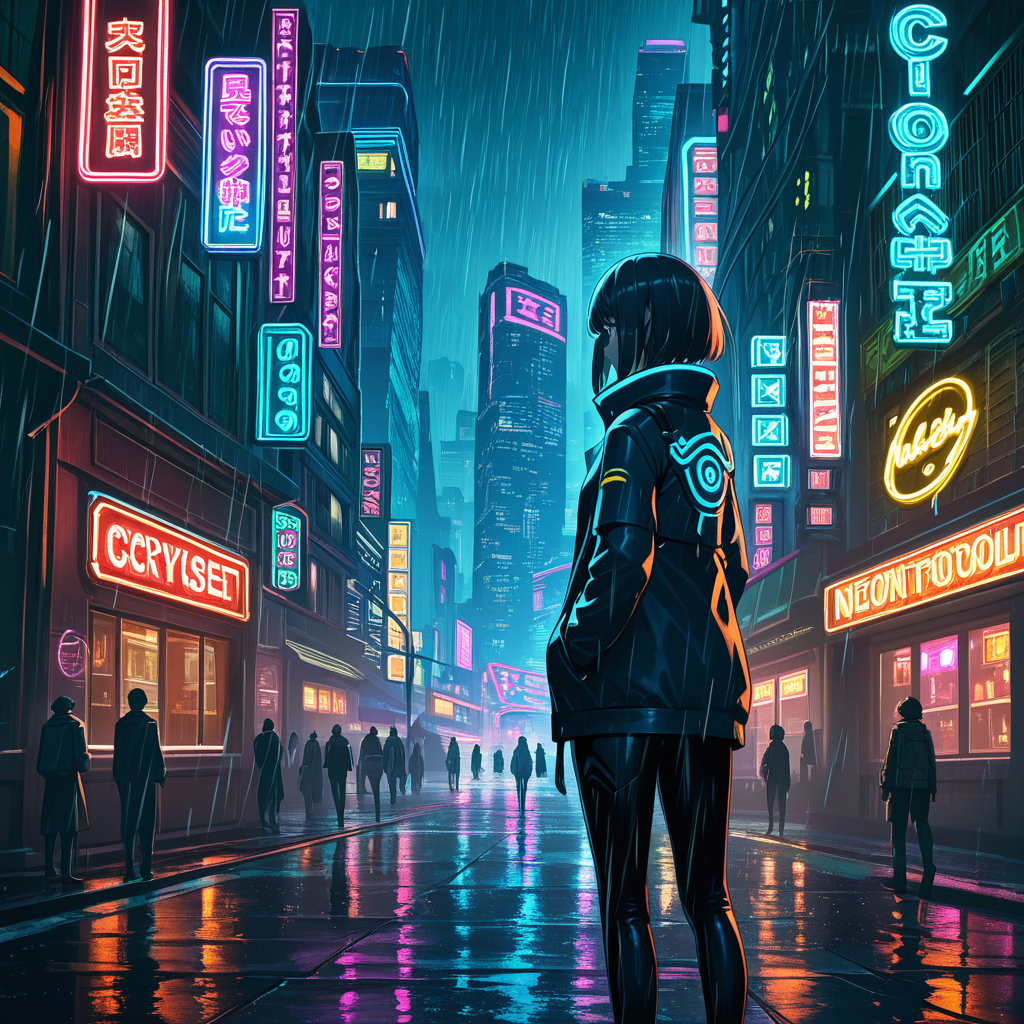

画像が 'generated_sdxl_base_image.png' として保存されました。


In [ ]:
# プロンプトの設定
prompt = input('prompt : ')
negative_prompt = input('negative : ')

# 画像生成
# パラメータは任意で調整してください
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=30, # 生成ステップ数 (SDXLは20-40ステップで十分)
    guidance_scale=7.5,    # プロンプトへの忠実度
    height=1024,           # SDXLの推奨解像度
    width=1024,            # SDXLの推奨解像度
    # seed=1234,           # シード値 (同じ画像を再現したい場合に設定)
).images[0]

# 生成された画像の表示
display(image)

# 画像の保存
# Google Driveに保存したい場合はパスを変更してください
image.save("/content/output/generated_image.png")
print("画像が 'generated_image.png' として保存されました。")